**Исследование популярного сервиса аренды самокатов GoFast.**

В вашем распоряжении данные о пользователях из нескольких городов, также об их поездках. Для совершения поездок, пользователи сервиса GoFast пользуются мобильным приложением, сервисом можно пользоваться с/без подписки, в зависимости от этого меняется абоненская плата, стоимость одной минут поездки и стоимость старта(начала поездки). Наша задача-проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.


## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
users=pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv') #изучим информацию о пользователях
display(users)
users.info()
users.describe()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Изучим информацию о пользователях. В датафрейме нам представлены 1565 строк и 5 столбцов, содержащие данные об уникальном идентификаторе пользователя, имени пользователя, возрасте, городе и типе подписки(free,ultra). Средний возраст пользователей -25 лет, самый молодой катающийся 12-ти лет, а самый взрослый - 43-х лет.


In [4]:
rides=pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv') #изучим информацию о поездках
display(rides)
rides.info()
rides.describe()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Изучим информацию о поездках. В датафрейме представлены 18068 строк и 4 столбца, передающие информацию об уникальном идентификаторе пользователя(user_id),расстоянии, которое пользователь проехал в текущей сессии (в метрах)-(distance), продолжительности сессии (в минутах)-(duration), дате совершения поездки(date). Пользователи проезжат от 0.8 до 7211 метров, в среднем-3070 метров, тратя на это от 0.5 до 40.8 минут, в среднем-17.8 минут.


In [5]:
subscriptions=pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv') #изучим информацию о подписках
display(subscriptions)
subscriptions.info()
subscriptions.describe()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Изучим информацию о подписках. У нас есть 2 вида подписок-free и ultra.Стоимость 1 минуты поездки по подписке free = 8, стоимость начала поездки = 50, стоимость ежемесячного платежа = 0. Для подписки ultra стоимость 1 минуты поездки = 6, стоимость начала подписки = 0, а стоимость ежемесячного платежа = 199.


## Предобработка данных

In [6]:
#приведем столбец date к типу даты pandas
rides['date'] = pd.to_datetime(rides['date'])

In [7]:
#создадим новый столбец с номером месяца
rides['month'] = rides['date'].dt.month


In [8]:
print('У нас имеются данные за период от', rides['date'].min(), 'до', rides['date'].max())

У нас имеются данные за период от 2021-01-01 00:00:00 до 2021-12-30 00:00:00


У нас имеются данные за периол с 1 января 2021 до 30 декабря 2021-тоесть за год

In [9]:
#проверим пропущенные значения в датасетах
print(users.isna().sum())
print(rides.isna().sum())
print(subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [10]:
# проверим наличие неявных дубликатов
print(users['name'].unique())
print(users['city'].unique())

['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Алина' 'Глеб' 'Андрей' 'Альбина' 'Людмила' 'Марсель' 'Милена'
 'Диана' 'Дарина' 'Данил' 'Артемий' 'Лиана' 'Альберт' 'Герман' 'Жанна'
 'Нелли' 'Евгения' 'Ариана' 'Самира' 'Захар' 'Эльвира' 'Екатерина' 'Инна'
 '

In [11]:
print(users['user_id'].duplicated().sum())

31


In [12]:
users = users.drop_duplicates(subset = ['user_id']).reset_index(drop=True)

В предобработке данных мы изменили тип столбца с датой, добавили новый столбец с номером месяца, определили за какой период нам предоставлены данные, проверили и обработали дубликаты в датафрейме.


## Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


<AxesSubplot:title={'center':'Гистограмма частоты встречаемости квартир'}, ylabel='Города'>

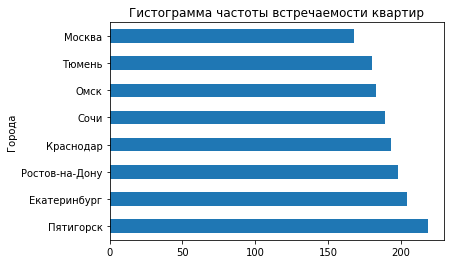

In [15]:
#частота встречаемости городов
print(users['city'].value_counts())
counts_city = users['city'].value_counts(ascending = False)
counts_city.plot.barh(title = 'Гистограмма частоты встречаемости квартир', xlabel ='Города', ylabel = 'частота встречаемости')


На диаграмме мы видим, что чаще всего встречается Пятигорск-в этом городе наиболее активно жители пользуются сервисом аренды самокатов GoFast, реже всего в Москве.

free     835
ultra    699
Name: subscription_type, dtype: int64


<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без подписки'}, xlabel='тип подписки (free, ultra)', ylabel='Количество'>

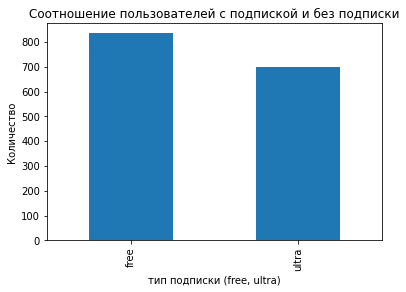

In [16]:
#соотношение пользователей с подпиской и без подписки  subscription_type
count_subscription = users['subscription_type'].value_counts()
print(count_subscription)
count_subscription.plot.bar(title='Соотношение пользователей с подпиской и без подписки', xlabel = 'тип подписки (free, ultra)', ylabel = 'Количество')

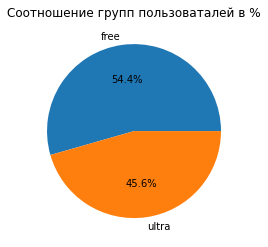

In [17]:
count_subscription = users['subscription_type'].value_counts()
plt.pie(count_subscription, labels = count_subscription.index , autopct = '%1.1f%%')
plt.title('Соотношение групп пользоваталей в %')
plt.show()

На диаграмме видим, что пользователи предпочитают пользоваться арендой самокатов без подписки на 8.8% случаев чаще, чем с подпиской.

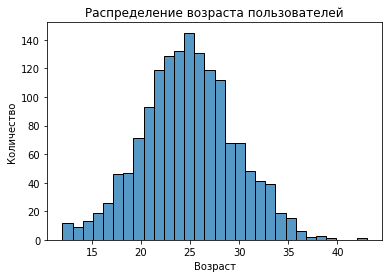

In [18]:
# визуализация распределения возраста пользователей
sns.histplot(users['age'], bins=30)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

На гистограмме видим нормальное распределение, прослеживается зависимость заинтересованности пользователей в сервисе от возраста- чем моложе пользователь, тем выше спрос на аренду самокатов, чем старше, тем ниже. Чаще всего пользуются сервисом люди 25-ти лет, а 39-43 лет в единичных случаях.


Text(0, 0.5, 'Количество')

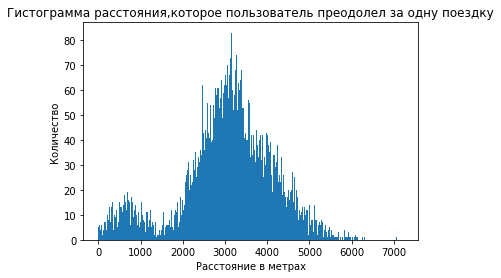

In [19]:
#расстояние, которое пользователь преодолел за одну поездку
plt.hist(rides['distance'], bins= 1000, range = (0,7211))
plt.title('Гистограмма расстояния,которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество')

Минимальный путь составил 0.8м(вероятно, это может быть ошибкой в вводимых данных или показатель несостоявшейся поездки), максимальная длина пути 7211 метров(7.2км) Чаще всего пользователи ездят на расстояния от 2500 до 3500 метров(2.5-3.5 км)


Text(0, 0.5, 'Частота')

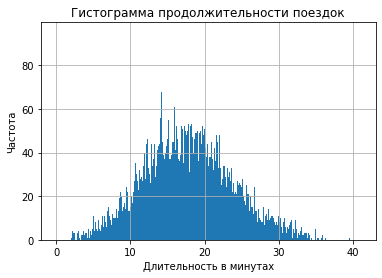

In [20]:
#продолжительность поездок
rides['duration'].hist(bins = 1000, range = (0,41))
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Длительность в минутах')
plt.ylabel('Частота')

Самая длительная поездка составила 40.8 минут, а самая короткая 0.5 минуты. Чаще всего пользователи катаются от 14 до 21 минут.

## Объединение данных

In [22]:
 #Объединим данные о пользователях, поездках и подписках в один датафрейм
merge_df1 = pd.merge(users,rides,on =['user_id'])
merge_df = pd.merge(merge_df1, subscriptions, on=['subscription_type'])
#округлим значения в столбце с продолжительностью поездки
merge_df['duration'] = np.ceil(merge_df['duration']) 
display(merge_df)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [23]:
#создадим датафрейм с данными о пользователях с подпиской
merge_ultra = merge_df[merge_df['subscription_type']== 'ultra']
display(merge_ultra)
print(merge_ultra.describe())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16.0,2021-10-17,10,6,0,199


           user_id          age     distance     duration        month  \
count  6500.000000  6500.000000  6500.000000  6500.000000  6500.000000   
mean    348.725385    24.892615  3115.445388    19.037692     6.422308   
std     201.099339     4.757208   836.895330     5.577439     3.414616   
min       1.000000    12.000000   244.210438     4.000000     1.000000   
25%     175.000000    22.000000  2785.444017    15.000000     4.000000   
50%     351.000000    25.000000  3148.637229    19.000000     6.000000   
75%     525.000000    28.000000  3560.574425    22.000000     9.000000   
max     699.000000    38.000000  5699.769662    41.000000    12.000000   

       minute_price  start_ride_price  subscription_fee  
count        6500.0            6500.0            6500.0  
mean            6.0               0.0             199.0  
std             0.0               0.0               0.0  
min             6.0               0.0             199.0  
25%             6.0               0.0      

Text(0, 0.5, 'Количество')

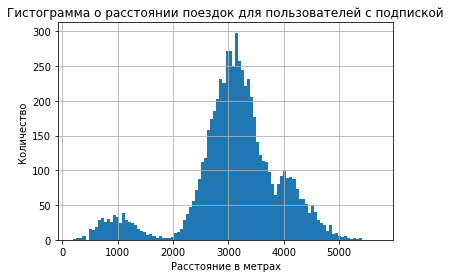

In [24]:
#построим графики о расстоянии поездок для пользователей с подпиской
merge_ultra['distance'].hist(bins = 100, range = (200, 5699))
plt.title('Гистограмма о расстоянии поездок для пользователей с подпиской')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

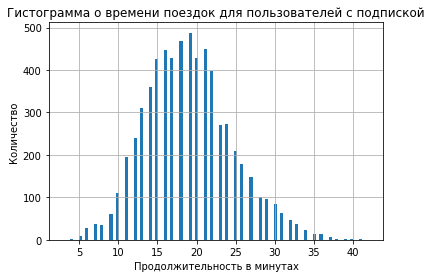

In [25]:
#построим графики о времени поездок для пользователей с подпиской
merge_ultra['duration'].hist(bins = 100, range = (3, 42))
plt.title('Гистограмма о времени поездок для пользователей с подпиской')
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество')

Пользователи с подпиской проезжают на самокате от 244 до 5699 метров, время затраченное на поездку колеблется от 3.7 до 40.8 минут. В среднем пользователи с подпиской проезжают 3115 метров, и тратят 18.5 минут на поездки.


In [26]:
#создадим датафрейм с данными о пользователях без подписки
merge_free = merge_df[merge_df['subscription_type']=='free']
display(merge_free)
print(merge_free.describe())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


            user_id           age      distance      duration         month  \
count  11568.000000  11568.000000  11568.000000  11568.000000  11568.000000   
mean    1120.527230     24.893326   3045.495282     17.890992      6.522994   
std      241.165628      4.481100   1246.173806      6.330250      3.449770   
min      700.000000     12.000000      0.855683      1.000000      1.000000   
25%      915.000000     22.000000   2366.562689     13.000000      4.000000   
50%     1123.000000     25.000000   3114.648465     18.000000      7.000000   
75%     1328.000000     28.000000   3905.697894     22.000000      9.000000   
max     1534.000000     43.000000   7211.007745     35.000000     12.000000   

       minute_price  start_ride_price  subscription_fee  
count       11568.0           11568.0           11568.0  
mean            8.0              50.0               0.0  
std             0.0               0.0               0.0  
min             8.0              50.0               0.0 

Text(0, 0.5, 'Количество')

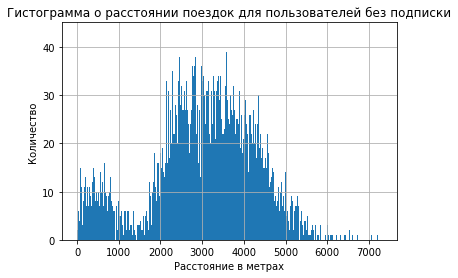

In [27]:
#построим графики о расстоянии поездок для пользователей без подписки
merge_free['distance'].hist(bins = 1000, range = (0, 7300))
plt.title('Гистограмма о расстоянии поездок для пользователей без подписки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество')


Text(0, 0.5, 'Количество')

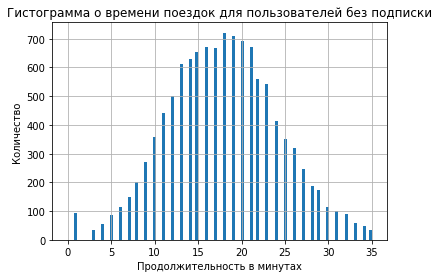

In [28]:
#построим графики о времени поездок для пользователей без подписки
merge_free['duration'].hist(bins = 100, range = (0, 35))
plt.title('Гистограмма о времени поездок для пользователей без подписки')
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество')

Пользовтаели без подписки проезжают от 0.8 до 7211 метров, и тратят на них от 0.5 до 35 минут. В среднем польватели без подписки проезжают около 3 км и катаются в среднем напротяжении 17 минут. ###у нас встречаются аномально низкие показатели по расстоянию и времени, скажи, пожалуйста, можем ли мы их удалить, или стоит обратить на них внимание-причины несостоявшихся поездок, возможно сбой программы, или проблемы с оплатой, вряд ли пользователь без причины за 30 секунд оставит идею катания на самокате.)

Text(0, 0.5, 'Количество')

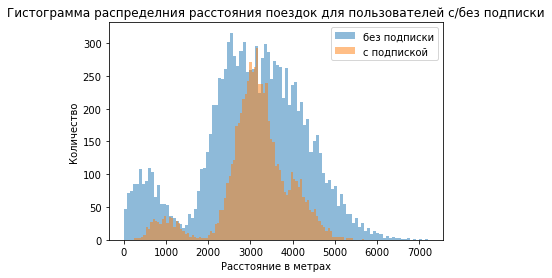

In [29]:
plt.hist(merge_free['distance'], bins =100, alpha = 0.5, label = 'без подписки')
plt.hist(merge_ultra['distance'], bins =100, alpha = 0.5, label = 'с подпиской')
plt.legend(loc='upper right')
plt.title('Гистограмма распределния расстояния поездок для пользователей с/без подписки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество')

Text(0.5, 1.0, 'Гистограмма распределния длительности поездок для пользователей с/без подписки')

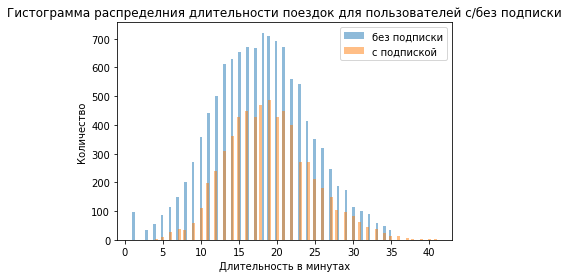

In [30]:
plt.hist(merge_free['duration'], bins =100, alpha = 0.5, label = 'без подписки')
plt.hist(merge_ultra['duration'], bins =100, alpha = 0.5, label = 'с подпиской')
plt.legend(loc='upper right')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество')
plt.title('Гистограмма распределния длительности поездок для пользователей с/без подписки')

## Подсчет выручки

In [31]:
#Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными
#найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
agg_merge_df = merge_df.groupby(['user_id', 'month']). agg({'distance': 'sum',
                                                           'user_id': 'count',
                                                           'duration': 'sum'})
agg_merge_df = agg_merge_df.rename(columns={'distance': 'total_distance',
                                           'user_id':'rides_amount',
                                           'duration':'total_duration'})
display(agg_merge_df)


total_distance  rides_amount  total_duration
user_id month                                              
1       1         7027.511294             2            42.0
        4          754.159807             1             7.0
        8         6723.470560             2            46.0
        10        5809.911100             2            32.0
        11        7003.499363             3            56.0
...                       ...           ...             ...
1534    6         3409.468534             2            26.0
        8         7622.453034             2            48.0
        9         4928.173852             1            23.0
        11       13350.015305             4            78.0
        12        2371.711192             1            16.0

[11331 rows x 3 columns]

In [32]:
#добавим в датафрейм столбец с помесячной выручкой
def calculate(row):
    user_id = row.name[0]
    month = row.name[1]
    subscription_type = users.loc[(users['user_id'] == user_id), 'subscription_type'].values[0]
    start_ride_price = subscriptions.loc[(subscriptions['subscription_type'] == subscription_type), 'start_ride_price'].values[0]
    minute_price = subscriptions.loc[(subscriptions['subscription_type'] == subscription_type), 'minute_price'].values[0]
    subscription_fee = subscriptions.loc[(subscriptions['subscription_type'] == subscription_type), 'subscription_fee'].values[0]
    rides_amount = row['rides_amount']
    total_duration = row['total_duration']

    return start_ride_price * rides_amount + minute_price * total_duration + subscription_fee

agg_merge_df['revenue'] = agg_merge_df.apply(calculate, axis = 1)
display(agg_merge_df)

total_distance  rides_amount  total_duration  revenue
user_id month                                                       
1       1         7027.511294             2            42.0    451.0
        4          754.159807             1             7.0    241.0
        8         6723.470560             2            46.0    475.0
        10        5809.911100             2            32.0    391.0
        11        7003.499363             3            56.0    535.0
...                       ...           ...             ...      ...
1534    6         3409.468534             2            26.0    308.0
        8         7622.453034             2            48.0    484.0
        9         4928.173852             1            23.0    234.0
        11       13350.015305             4            78.0    824.0
        12        2371.711192             1            16.0    178.0

[11331 rows x 4 columns]

In [33]:
agg_merge_df = merge_df.groupby(['user_id', 'month']). agg({'distance': 'sum',
                                                           'user_id': 'count',
                                                           'duration': 'sum',
                                                           'subscription_fee':'first',
                                                           'start_ride_price':'first',
                                                           'minute_price':'first'})
agg_merge_df = agg_merge_df.rename(columns={'distance': 'total_distance',
                                           'user_id':'rides_amount',
                                           'duration':'total_duration'})
agg_merge_df['revenue'] = agg_merge_df['start_ride_price'] * agg_merge_df['rides_amount'] + agg_merge_df['minute_price'] * agg_merge_df['total_duration'] 
+ agg_merge_df['subscription_fee']
display(agg_merge_df)

total_distance  rides_amount  total_duration  subscription_fee  \
user_id month                                                                   
1       1         7027.511294             2            42.0               199   
        4          754.159807             1             7.0               199   
        8         6723.470560             2            46.0               199   
        10        5809.911100             2            32.0               199   
        11        7003.499363             3            56.0               199   
...                       ...           ...             ...               ...   
1534    6         3409.468534             2            26.0                 0   
        8         7622.453034             2            48.0                 0   
        9         4928.173852             1            23.0                 0   
        11       13350.015305             4            78.0                 0   
        12        2371.711192             1            16.0                 0   

               start_ride_price  minute_price  revenue  
user_id month                                           
1       1                     0             6    252.0  
        4                     0             6     42.0  
        8                     0             6    276.0  
        10                    0             6    192.0  
        11                    0             6    336.0  
...                         ...           ...      ...  
1534    6                    50             8    308.0  
        8                    50             8    484.0  
        9                    50             8    234.0  
        11                   50             8    824.0  
        12                   50             8    178.0  

[11331 rows x 7 columns]

## Проверка гипотез

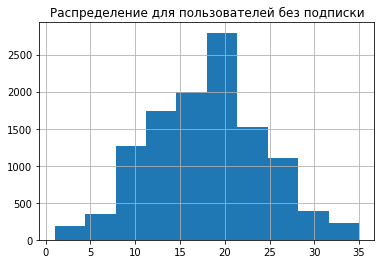

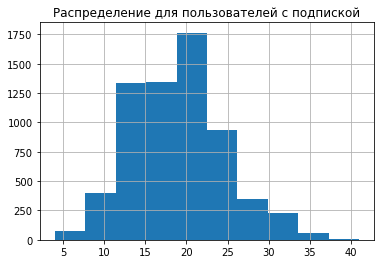

In [34]:
#Проверим распределение продолжительности сеанса для пользователей с/без подписки
merge_free['duration'].hist()
plt.title('Распределение для пользователей без подписки')
plt.show()
merge_ultra['duration'].hist()
plt.title('Распределение для пользователей с подпиской')
plt.show()
#видим нормальное распределение, значит может использовать t-критерий Стъюдента

Н0-среднияя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок без подписки.
Н1(альтернативная гипотеза)- средняя продолжительность поездки пользователей с подпиской, большем, чем без подписки.


In [35]:
sample_1 = merge_ultra['duration']
sample_2 = merge_free['duration']
results = st.ttest_ind(sample_1, sample_2, equal_var=False, alternative='greater')
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средняя продолжительность поездки пользователей с подпиской больше, чем без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу:средняя продолжительность поездки пользователей с подпиской НЕ больше, чем без подписки')
print('Средняя продолжительность поездок для пользователей с подпиской :',merge_ultra['duration'].mean())
print('Средняя продолжительность поездок для пользователей без подписки :',merge_free['duration'].mean())
    
    

p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу: средняя продолжительность поездки пользователей с подпиской больше, чем без подписки
Средняя продолжительность поездок для пользователей с подпиской : 19.037692307692307
Средняя продолжительность поездок для пользователей без подписки : 17.890992392807746


Средняя продолжительность поездки пользователей с подпиской больше, чем без подписки, а чем дольше продолжительность аренды, тем выгоднее для арендодателя. Стоит произвести расчеты с учетом начала поездки и стоимости минуты, для того, чтобы сделать более точное предположение о том, насколько выгодны пользователи с подпиской для арендодателя.


H0- расстояние, которое проезжают пользователи с подпиской за 1 сессию равно 3130 метрам.
Н1 - расстояние, которое проезжают пользовтаели с подпиской за 1 сессию больше 3130 метров.


In [36]:
metr_distance = merge_ultra['distance']
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(metr_distance, optimal_distance, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров')
else:
    print('Не получилось отвегнуть нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров')

p-значение: 0.9195368847849785
Не получилось отвегнуть нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров


За одну поездку пользователи с подпиской обычно проезжают до 3130 метров, это оптимальное, для 1 сессии, растояние с точки зрения износа самоката. 

H0-помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки            
H1-помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки"


In [37]:
agg_merge_df = pd.merge(agg_merge_df, users[['user_id', 'subscription_type']], on='user_id')
revenue_ultra= agg_merge_df['revenue'][agg_merge_df['subscription_type']=='ultra']
revenue_free= agg_merge_df['revenue'][agg_merge_df['subscription_type']=='free']
results = st.ttest_ind(revenue_ultra, revenue_free, equal_var=False, alternative = 'greater')
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу:помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу:помесячная выручка от пользователей с подпиской не превышает выручку от пользователей без подписки')
print('Средняя помесячная выручка для пользователей с подпиской :',revenue_ultra.mean())
print('Средняя помесячная выручка для пользователей без подписки :',revenue_free.mean())
        

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу:помесячная выручка от пользователей с подпиской не превышает выручку от пользователей без подписки
Средняя помесячная выручка для пользователей с подпиской : 163.79219060225017
Средняя помесячная выручка для пользователей без подписки : 328.6413651073845


## Вывод:


Исследование популярного сервиса аренды самокатов GoFast.

Изучили данные о пользователях из нескольких городов, также об их поездках. Для совершения поездок, пользователи сервиса GoFast пользуются мобильным приложением, сервисом можно пользоваться с/без подписки, в зависимости от этого меняется абоненская плата, стоимость одной минут поездки и стоимость старта(начала поездки). Наша задача-проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Нам предоставлены данные за период с 1 января 2021 до 30 декабря 2021 , содержащие имена,возраста(пользователи сервиса от 12 до 43 лет) и города проживания пользователей,так же тип их подписки-free,ultra(Стоимость 1 минуты поездки по подписке free = 8, стоимость начала поездки = 50, стоимость ежемесячного платежа = 0. Для подписки ultra стоимость 1 минуты поездки = 6, стоимость начала подписки = 0, а стоимость ежемесячного платежа = 199.);мы можем посмотреть информацию о расстоянии, которое пользователь проехал в текущей сессии (в метрах), продолжительности сессии (в минутах), дате совершения поездки.
В предобработке данных мы изменили тип столбца с датой, добавили новый столбец с номером месяца, определили за какой период нам предоставлены данные, проверили и обработали дубликаты в датафрейме.
Пользователи предпочитают пользоваться арендой самокатов без подписки на 8.8% случаев чаще, чем с подпиской, активнее всего в Пятигорске, реже всего в Москве.
Прослеживается зависимость заинтересованности пользователей в сервисе в зависимости от возраста- чем моложе пользователь, тем выше спрос на аренду самокатов, чем старше, тем ниже. Чаще всего пользуются сервисом люди 25-ти лет, а 39-43 лет в единичных случаях.
Пользователи с подпиской проезжают на самокате от 244 до 5699 метров, время затраченное на поездку колеблется от 3.7 до 40.8 минут. За одну сессию пользователи с подпиской обычно проезжают до 3130 метров, это оптимальное растояние с точки зрения износа самоката, и тратят 18.5 минут на поездки.
Пользователи без подписки проезжают от 0.8 до 7211 метров, и тратят на них от 0.5 до 35 минут, в среднем около 3 км и катаются в среднем напротяжении 17 минут.

Средняя продолжительность поездки пользователей с подпиской больше, чем без подписки, а чем дольше продолжительность аренды, тем выгоднее для арендодателя. Стоит произвести расчеты с учетом начала поездки и стоимости минуты, для того, чтобы сделать более точное предположение о том, насколько выгодны пользователи с подпиской для арендодателя.

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Средняя помесячная выручка для пользователей с подпиской : 362.7921906022502
Средняя помесячная выручка для пользователей без подписки : 328.6413651073845

Подводя итог-product-менеджерам сервиса стоит направить все рекламные акции на привлечение внимания пользователей к покупке подписки, тк это как повысит прибыль для GoFast, так и снизит траты на починку/замену изношенных самокатов.
